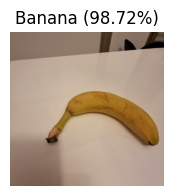

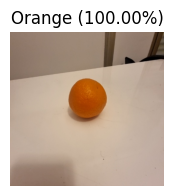

In [9]:
import tensorflow as tf  
import numpy as np  
from tensorflow.keras.preprocessing import image  
import matplotlib.pyplot as plt  
  
# Define the function to load the image and preprocess it  
def load_and_preprocess_image(image_path, target_size=(128, 128)):  
    img = image.load_img(image_path, target_size=target_size)  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch  
    img_array /= 255.0  # Rescale image values to [0, 1]  
    return img_array  
  
# Load the saved model  
loaded_saved_model = tf.saved_model.load("output/saved_model")  
  
# The model's serving default signature can be called like a function  
infer = loaded_saved_model.signatures["serving_default"]  
def predict_and_display_image_saved_model(image_path, model_infer):    
    img_array = load_and_preprocess_image(image_path)    
    # TensorFlow saved_model expects a tf.constant in the serving signature   
    prediction = model_infer(tf.constant(img_array))['dense_1']  # Change 'dense_3' to the actual output key if different  
    
    # Extract prediction scores    
    prediction_scores = prediction.numpy()[0]  # Adjusted for a multi-class output  
    
    # Determine class based on the highest probability  
    class_labels = ['Banana', 'Orange']  # Assuming '0' is Banana and '1' is Orange  
    class_prediction = class_labels[np.argmax(prediction_scores)]  
    score = np.max(prediction_scores) * 100  # Convert the highest probability to a percentage  
    
    # Display the image with prediction    
    img = image.load_img(image_path)    
    plt.figure(figsize=(2, 2))    
    plt.imshow(img)    
    plt.axis('off')  # Don't show axes for images    
    plt.title(f'{class_prediction} ({score:.2f}%)')    
    plt.show()    
# Example usage  
predict_and_display_image_saved_model( "test/banana.4piv5bho.ingestion-d59dc547b-j6mhk.jpg"  , infer)  
predict_and_display_image_saved_model("test/orange.4piv9lmk.ingestion-d59dc547b-94nn2.jpg"  , infer)  